## **Parte 1: optimización numérica**
Considere las siguientes funciones de prueba:
  * Función de Rosenbrock
  * Función de Rastrigin
  * Función de Schwefel.
  * Función de Griewank
  * Función Goldstein-Price
  * Función de las seis jorobas de camello ()

1. Escoja dos funciones de prueba
2. Optimice las funciones en dos y tres dimensiones usando un método de descenso por gradiente con condición inicial aleatoria
3. Optimice las funciones en dos y tres dimensiones usando: algoritmos evolutivos, optimización de partículas y evolución diferencial
4. Represente con un gif animado o un video el proceso de optimización de descenso por gradiente y el proceso usando el método heurístico.

In [4]:
%%capture
!pip install pygad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML;
import pygad

rc('animation', html='html5');


## 1. Funciones de Prueba

La funciones de prueba escogidas para probar los métodos de optimización serán las siguientes:

* Función de Rastrigin
* Función de Schwefel


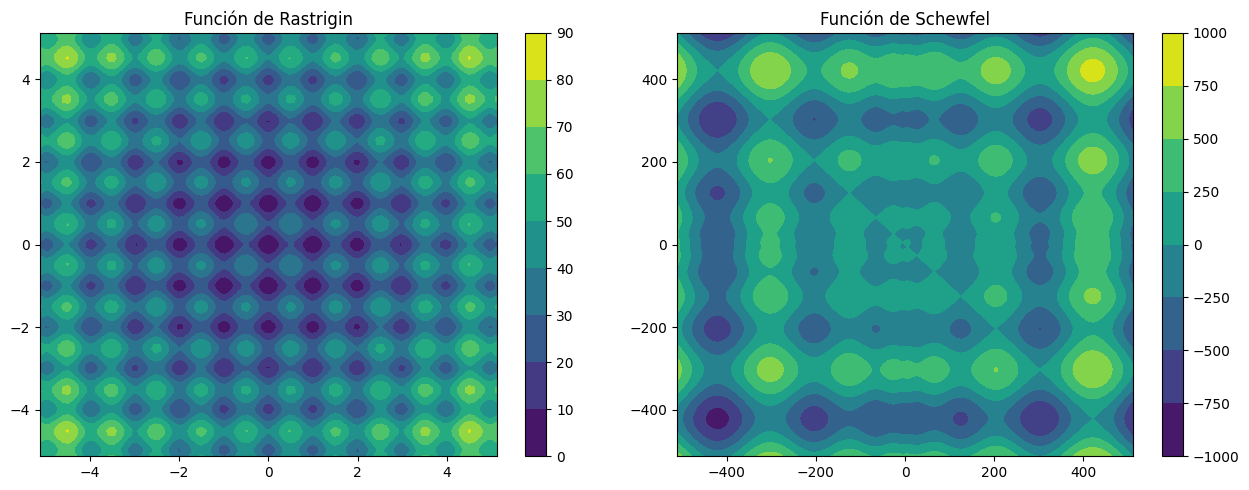

In [5]:
# Se implementa la función de Rastrigin vectorizada para arreglos numpy
def Rastrigin(X):
  Y = 10 * len(X) + np.sum(X ** 2 - 10 * np.cos(2 * np.pi * X))
  return Y

# Se implementa la función de Schwefel vectorizada para arreglos numpy
def Schwefel(X):
    Y = np.sum(X * np.sin(np.sqrt(np.abs(X))))
    return(Y)

# Visualización de la función de Rastrigin en 2D
ncols = 100
nrows = 100
X1 = np.linspace(-5.12, 5.12, ncols)
Y1 = np.linspace(-5.12, 5.12, nrows)
X1, Y1 = np.meshgrid(X1, Y1)

Z1 = [Rastrigin(np.array([X1[i,j], Y1[i,j]])) for i in range(nrows) for j in range(ncols)]
Z1 = np.array(Z1).reshape([nrows,ncols])

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(13,5)
contorno = ax1.contourf(X1,Y1,Z1)
ax1.set_title("Función de Rastrigin")
fig.colorbar(contorno, ax=ax1)
fig.subplots_adjust(wspace=1.5)

# Visualización de la función de Schwefel en 2D
X2 = np.linspace(-512, 512, ncols*10)
Y2 = np.linspace(-512, 512, nrows*10)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = [Schwefel(np.array([X2[i,j], Y2[i,j]])) for i in range(nrows*10) for j in range(ncols*10)]
Z2 = np.array(Z2).reshape([nrows*10,ncols*10])
contorno2 = ax2.contourf(X2,Y2,Z2)
fig.colorbar(contorno2, ax=ax2)
ax2.set_title("Función de Schewfel")


plt.tight_layout()
plt.show()


## 2. Optimización mediante descenso por gradiente



### **- Implementación de funciones para optimizar**

A continuación se implementan las funciones para hallar el gradiente y la función pra optimizar mediante descenso por gradiente

In [6]:
# La siguiente función implementa el cálculo del gradiente usando 'list comprehension'
def num_grad(x, fun, h=0.01):
    return np.array([(fun(x+e*h) - fun(x-e*h)) / (2*h) for e in np.eye(len(x))])

# La siguiente función implmenta la optimización mediante descenso por gradiente
def optimizador_mult_numdev(f, x0, eta=0.01, tol=1e-6, max_iter=1e3):
    x = np.array(x0)
    iter = 0
    while np.linalg.norm(num_grad(x, f, h=0.01)) > tol and iter < max_iter:
        x = x - eta*num_grad(x, f, h=0.01)
        iter += 1
    return x


### 2.1 Función de Rastrigin




#### Generación del gráfico

Se procede a definir las características del gráfico que representará todo.

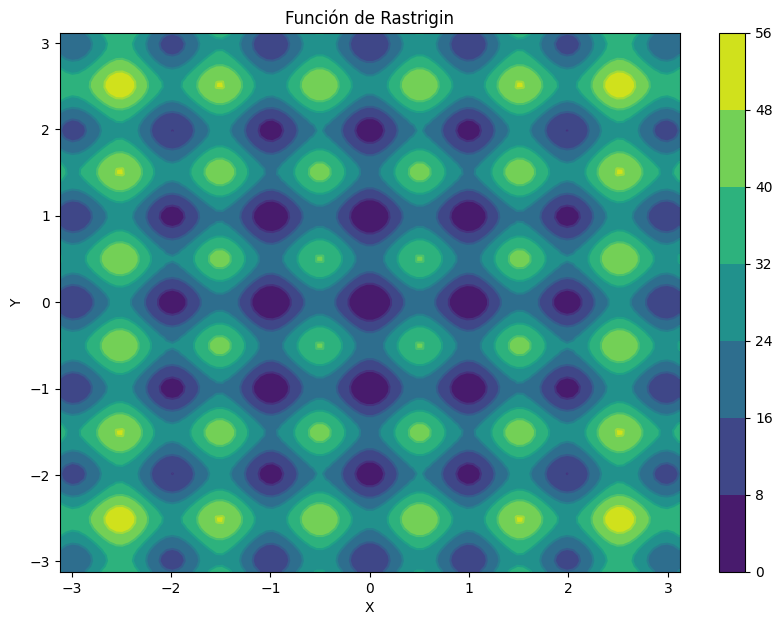

In [7]:
# Particionamiento del rango de cada variable
ncols = 100
nrows = 100
X = np.linspace(-3.12, 3.12, ncols)  #Posibles valores de X
Y = np.linspace(-3.12, 3.12, nrows)  #Posibles valores de Y
X, Y = np.meshgrid(X, Y)  #Definición del plano con posibles valores

# Evaluación de la función de Rastrigin
Z = [Rastrigin(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
contorno = ax.contour(X,Y,Z)  #Curvas de nivel de la función de Rastrigin
contornof = ax.contourf(X,Y,Z) #Rellenando las curvas de nivel
line, = ax.plot([], [], 'xr--',mec='b') #Creando la línea que contendrá los puntos
              # de la animación de Optimización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función de Rastrigin')
plt.colorbar(contornof) # Se muestra la barra lateral con la escala de valores
          # ¡¡Éste método depende de la creación de un objeto "contourf" !!
plt.show()


:Aquí optimizamos para hallar el mínimo de la función, y de paso animamos los datos en el gráfico anteriormente elaborado

In [10]:
%%capture
!apt-get install ffmpeg 
!pip install imageio
!pip install imageio-ffmpeg
import numpy as np

# Implementación del método de descenso por gradiente
x0 = np.array([4*np.random.random()-1,4*np.random.random()-1])
xs = [x0]
for i in range(25):
    x_new = optimizador_mult_numdev(Rastrigin, x0)
    xs.append(x_new)
    x0 = x_new

# Definición de la función graficadora
def graficar(frame):
    x, y = zip(*xs[:frame+1])
    line.set_data(x, y)
    return line,

# Animación final
ani = animation.FuncAnimation(fig, graficar, frames=len(xs), interval=300)
ani

RuntimeError: Requested MovieWriter (ffmpeg) not available

### 2.2 Función de Schwefel

[texto del vínculo](https://)Con las funciones de derivadas parciales y de optimización ya implementadas, sólo resta recalcular los datos para la función de Schwefel y generar el gráfico.

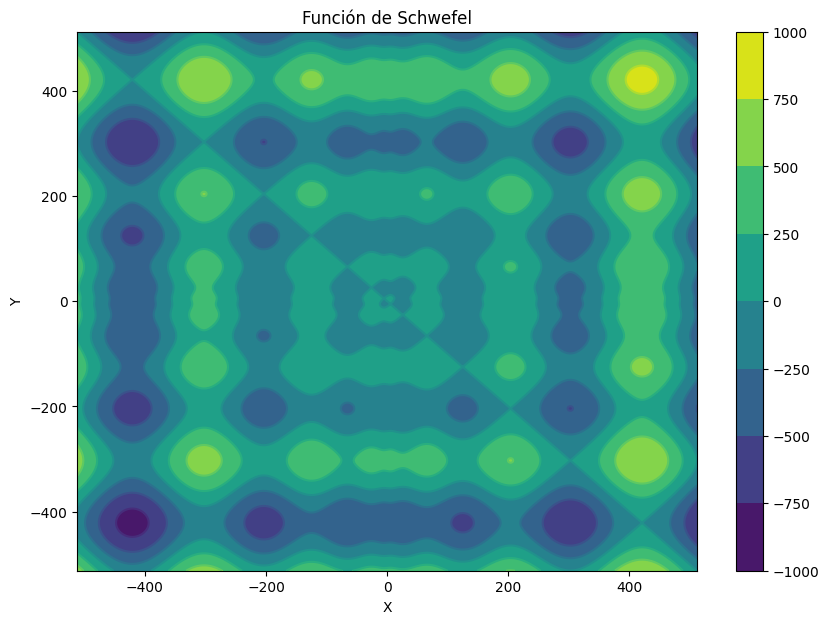

In [ ]:
# Particionamiento del rango de cada variable
ncols = 1000
nrows = 1000
X = np.linspace(-512, 512, ncols)  #Posibles valores de X
Y = np.linspace(-512, 512, nrows)  #Posibles valores de Y
X, Y = np.meshgrid(X, Y)  #Definición del plano con posibles valores

# Evaluación de la función de Rastrigin
Z = [Schwefel(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
contorno = ax.contour(X,Y,Z)  #Curvas de nivel de la función de Rastrigin
contornof = ax.contourf(X,Y,Z) #Rellenando las curvas de nivel
line, = ax.plot([], [], 'xr--',mec='b') #Creando la línea que contendrá los puntos
              # de la animación de Optimización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función de Schwefel')
plt.colorbar(contornof) # Se muestra la barra lateral con la escala de valores
          # ¡¡Éste método depende de la creación de un objeto "contourf" !!
plt.show()

Ahora optimizamos y animamos los resultados en el gráfico anteriormente elaborado

In [3]:
# Implementación del método de descenso por gradiente
x0 = np.array([300*(2*np.random.random()-1),300*(2*np.random.random()-1)]) # generación de un punto aleatorio
xs = [x0]
for i in range(25):
    x_new = optimizador_mult_numdev(Schwefel, x0)
    xs.append(x_new)
    x0 = x_new

# Definición de la función graficadora
def graficar(frame):
    x, y = zip(*xs[:frame+1])
    line.set_data(x, y)
    return line,

# Animación final
ani = animation.FuncAnimation(fig, graficar, frames=len(xs), interval=300)
ani

NameError: name 'optimizador_mult_numdev' is not defined

## 3. Optimización mediante algoritmos evolutivos

### **- Modificación de las funciones de prueba iniciales**

Aquí modificamos las definiciones de las funciones de prueba para que se ajusten a nuestro algoritmo evolutivo

In [ ]:
# Se implementa la función de Rastrigin vectorizada para arreglos numpy
def Rastrigin_ga(X,solutionidx):
  Y = 10 * len(X) + np.sum(X ** 2 - 10 * np.cos(2 * np.pi * X))
  fitness = -Y
  return (fitness)

# Se implementa la función de Schwefel vectorizada para arreglos numpy
def Schwefel_ga(X,solutionidx):
    Y = np.sum(X * np.sin(np.sqrt(np.abs(X))))
    fitness = -Y
    return(fitness)

### 3.1 Función de Rastrigin

#### - Optimización de la función de Rastrigin

Aquí se crea una instancia de nuestro algoritmo genético usando pygad para optimizar la función de Rastrigin.

Especificaciones de los parámetros:

* Se usa un número de generaciones de 60
* Se emparejan 2 individuos en cada generación
* La función de ajuste será nuestra función de prueba
* Se tomarán 9 individuos en cada generación
* El criterio de selección de reproducción : mejores individuos
* Tipo de mutación: Aleatoria

In [ ]:
%%capture
# Se ajusta la función de Rastrigin para cumplir con los nuevos requisitos de PyGAD
def Rastrigin_ga(solution, solution_idx, ga_instance):
  X = solution
  Y = 10 * len(X) + np.sum(X ** 2 - 10 * np.cos(2 * np.pi * X))
  fitness = -Y # Cambiamos el signo porque estamos minimizando
  return fitness

ga_instance_rastrigin = pygad.GA(num_generations=60,
                       num_parents_mating=2,
                       fitness_func=Rastrigin_ga,
                       sol_per_pop=9,
                       num_genes=2,
                       init_range_low=-5,
                       init_range_high=4,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

TypeError: GA.__init__() got an unexpected keyword argument 'save_solutions'

Una vez creada la instancia de nuestro algoritmo, ejecutamos la optimización mediante el algoritmo evolutivo y mostramos la evolución del ajuste generación tras generación






In [ ]:
ga_instance_rastrigin.run()
soluciones_rastrigin = ga_instance_rastrigin.solutions
ga_instance_rastrigin.plot_fitness()
plt.show()


NameError: name 'ga_instance_rastrigin' is not defined

#### - Muestra de gráficos

Generamos un gráfico nuevamente para nuestra función de prueba

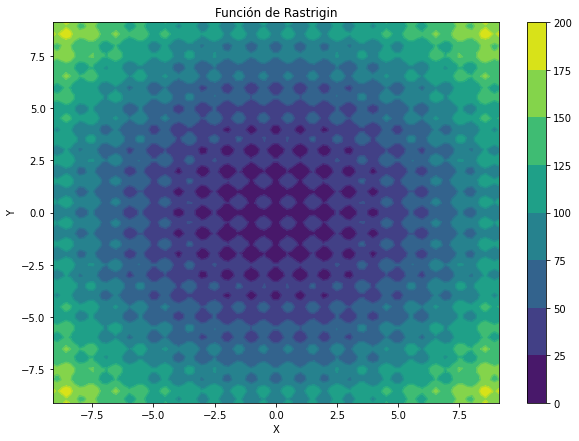

In [ ]:
# Particionamiento del rango de cada variable
ncols = 100
nrows = 100
X = np.linspace(-9.12, 9.12, ncols)  #Posibles valores de X
Y = np.linspace(-9.12, 9.12, nrows)  #Posibles valores de Y
X, Y = np.meshgrid(X, Y)  #Definición del plano con posibles valores

# Evaluación de la función de Rastrigin
Z = [-Rastrigin_ga(np.array([X[i,j], Y[i,j]]),1) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
contorno = ax.contour(X,Y,Z)  #Curvas de nivel de la función de Rastrigin
contornof = ax.contourf(X,Y,Z) #Rellenando las curvas de nivel
line, = ax.plot([], [], 'xr--',mec='b') #Creando la línea que contendrá los puntos
              # de la animación de Optimización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función de Rastrigin')
plt.colorbar(contornof) # Se muestra la barra lateral con la escala de valores
          # ¡¡Éste método depende de la creación de un objeto "contourf" !!
plt.show()

Y animamos los resultados obtenidos después de aplicar el algoritmo evolutivo

In [ ]:
# Definición de la función graficadora
def graficar(frame):
    x, y = zip(*soluciones_rastrigin[:frame+1])
    line.set_data(x, y)
    return line,

# Animación final
ani = animation.FuncAnimation(fig, graficar, frames=len(xs), interval=300)
ani

### 3.2 Función de Schwefel




#### - Optimización de la función de Schwefel

Aquí se crea una instancia de nuestro algoritmo genético usando pygad para optimizar la función de Schwefel.

Especificaciones de los parámetros:

* Se usa un número de generaciones de 60
* Se emparejan 2 individuos en cada generación
* La función de ajuste será nuestra función de prueba
* Se tomarán 9 individuos en cada generación
* El criterio de selección de reproducción : mejores individuos
* Tipo de mutación: Aleatoria

In [ ]:
%%capture
# Adjusting the Schwefel_ga function definition to match the required signature by PyGAD.
def Schwefel_ga(solution, solution_idx, ga_instance):
    X = solution
    Y = np.sum(X * np.sin(np.sqrt(np.abs(X))))
    fitness = -Y  # Negating because we are minimizing
    return fitness

ga_instance_schwefel = pygad.GA(num_generations=60,
                       num_parents_mating=2,
                       fitness_func=Schwefel_ga,
                       sol_per_pop=9,
                       num_genes=2,
                       init_range_low=-500,
                       init_range_high=500,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

Una vez creada la instancia de nuestro algoritmo, en este caso para Schwefel, ejecutamos la optimización mediante el algoritmo evolutivo y mostramos la evolución del ajuste generación tras generación

[[158.47780624502286, 128.840294248933], [476.45251262203476, -70.34335843993568], [66.97405782892793, -69.79628027981454], [465.60364567237605, 312.795488292374], [-12.209156465718934, -266.8827318534202], [-57.78833037283749, 133.13013098769716], [268.7963007941979, -236.81702894374155], [-147.13606020301086, -248.36227942227006], [263.36376208796855, -433.77623908263274], [263.36376208796855, -433.77623908263274], [268.7963007941979, -237.55533213906045], [268.7963007941979, -434.4400796187232], [262.99842098580325, -236.81702894374155], [263.36376208796855, -434.03385234986956], [263.36376208796855, -235.82945418345173], [268.7963007941979, -433.56019908713415], [268.7963007941979, -236.63512689878692], [268.7963007941979, -434.5394104800309], [268.7963007941979, -433.56019908713415], [268.7963007941979, -433.4813978603114], [268.7963007941979, -433.5862646088142], [268.7963007941979, -434.73280317859843], [268.9448659852252, -433.56019908713415], [269.21292694146746, -434.44007961

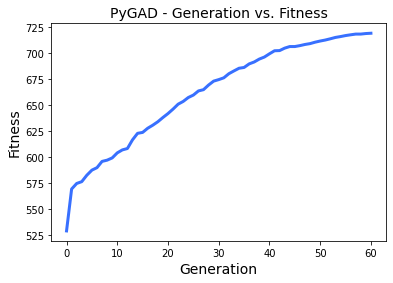

In [ ]:
ga_instance_schwefel.run()
soluciones_schwefel = ga_instance_schwefel.solutions
print(soluciones_schwefel)
ga_instance_schwefel.plot_fitness()
plt.show()


#### - Muestra de gráficos

Generamos un gráfico nuevamente para nuestra función de prueba

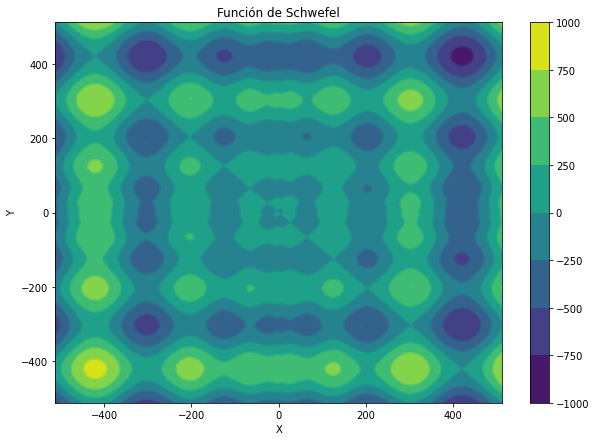

In [ ]:
# Particionamiento del rango de cada variable
ncols = 100
nrows = 100
X = np.linspace(-512, 512, ncols)  #Posibles valores de X
Y = np.linspace(-512, 512, nrows)  #Posibles valores de Y
X, Y = np.meshgrid(X, Y)  #Definición del plano con posibles valores

# Evaluación de la función de Rastrigin
Z = [Schwefel_ga(np.array([X[i,j], Y[i,j]]),1) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
contorno = ax.contour(X,Y,Z)  #Curvas de nivel de la función de Rastrigin
contornof = ax.contourf(X,Y,Z) #Rellenando las curvas de nivel
line, = ax.plot([], [], 'xr--',mec='b') #Creando la línea que contendrá los puntos
              # de la animación de Optimización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función de Schwefel')
plt.colorbar(contornof) # Se muestra la barra lateral con la escala de valores
          # ¡¡Éste método depende de la creación de un objeto "contourf" !!
plt.show()

Y animamos los resultados obtenidos después de aplicar el algoritmo evolutivo

In [ ]:
# Definición de la función graficadora
def graficar(frame):
    x, y = zip(*soluciones_schwefel[:frame+1])
    line.set_data(x, y)
    return line,

# Animación final
ani = animation.FuncAnimation(fig, graficar, frames=len(xs), interval=300)
ani

# Punto 2. Problema del vendedor

In [ ]:
#%%capture
#importacion de librerias necesarias

#%pip install --upgrade pygad

%pip install pygad==2.5.0
%pip install pyproj
%pip install geopandas
%pip install matplotlib
%pip install shapely
%pip install pandas
%pip install imageio
%pip install pandas openpyxl



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[noti

In [ ]:
import numpy as np
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point
import os
import pygad
import itertools
from matplotlib import animation, rc
import pandas as pd
import imageio

#from pygad import gann

### Algoritmo Hormigas

https://github.com/johnberroa/Ant-Colony-Optimization/blob/master/AntColonyOptimizer.py

In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings

warnings.filterwarnings("ignore")


class AntColonyOptimizer:
    def __init__(self, ants, evaporation_rate, intensification, alpha=1.0, beta=0.0, beta_evaporation_rate=0,
                 choose_best=.1):
        """
        Ant colony optimizer.  Traverses a graph and finds either the max or min distance between nodes.
        :param ants: number of ants to traverse the graph
        :param evaporation_rate: rate at which pheromone evaporates
        :param intensification: constant added to the best path
        :param alpha: weighting of pheromone
        :param beta: weighting of heuristic (1/distance)
        :param beta_evaporation_rate: rate at which beta decays (optional)
        :param choose_best: probability to choose the best route
        """
        # Parameters
        self.ants = ants
        self.evaporation_rate = evaporation_rate
        self.pheromone_intensification = intensification
        self.heuristic_alpha = alpha
        self.heuristic_beta = beta
        self.beta_evaporation_rate = beta_evaporation_rate
        self.choose_best = choose_best

        # Internal representations
        self.pheromone_matrix = None
        self.heuristic_matrix = None
        self.probability_matrix = None

        self.map = None
        self.set_of_available_nodes = None

        # Internal stats
        self.best_series = []
        self.best = None
        self.fitted = False
        self.best_path = None
        self.fit_time = None

        # Plotting values
        self.stopped_early = False

    def __str__(self):
        string = "Ant Colony Optimizer"
        string += "\n--------------------"
        string += "\nDesigned to optimize either the minimum or maximum distance between nodes in a square matrix that behaves like a distance matrix."
        string += "\n--------------------"
        string += "\nNumber of ants:\t\t\t\t{}".format(self.ants)
        string += "\nEvaporation rate:\t\t\t{}".format(self.evaporation_rate)
        string += "\nIntensification factor:\t\t{}".format(
            self.pheromone_intensification)
        string += "\nAlpha Heuristic:\t\t\t{}".format(self.heuristic_alpha)
        string += "\nBeta Heuristic:\t\t\t\t{}".format(self.heuristic_beta)
        string += "\nBeta Evaporation Rate:\t\t{}".format(
            self.beta_evaporation_rate)
        string += "\nChoose Best Percentage:\t\t{}".format(self.choose_best)
        string += "\n--------------------"
        string += "\nUSAGE:"
        string += "\nNumber of ants influences how many paths are explored each iteration."
        string += "\nThe alpha and beta heuristics affect how much influence the pheromones or the distance heuristic weigh an ants' decisions."
        string += "\nBeta evaporation reduces the influence of the heuristic over time."
        string += "\nChoose best is a percentage of how often an ant will choose the best route over probabilistically choosing a route based on pheromones."
        string += "\n--------------------"
        if self.fitted:
            string += "\n\nThis optimizer has been fitted."
        else:
            string += "\n\nThis optimizer has NOT been fitted."
        return string

    def _initialize(self):
        """
        Initializes the model by creating the various matrices and generating the list of available nodes
        """
        assert self.map.shape[0] == self.map.shape[1], "Map is not a distance matrix!"
        num_nodes = self.map.shape[0]
        self.pheromone_matrix = np.ones((num_nodes, num_nodes))
        # Remove the diagonal since there is no pheromone from node i to itself
        self.pheromone_matrix[np.eye(num_nodes) == 1] = 0
        self.heuristic_matrix = 1 / self.map
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
            self.heuristic_matrix ** self.heuristic_beta)  # element by element multiplcation
        self.set_of_available_nodes = list(range(num_nodes))

    def _reinstate_nodes(self):
        """
        Resets available nodes to all nodes for the next iteration
        """
        self.set_of_available_nodes = list(range(self.map.shape[0]))

    def _update_probabilities(self):
        """
        After evaporation and intensification, the probability matrix needs to be updated.  This function
        does that.
        """
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
            self.heuristic_matrix ** self.heuristic_beta)

    def _choose_next_node(self, from_node):
        """
        Chooses the next node based on probabilities.  If p < p_choose_best, then the best path is chosen, otherwise
        it is selected from a probability distribution weighted by the pheromone.
        :param from_node: the node the ant is coming from
        :return: index of the node the ant is going to
        """
        numerator = self.probability_matrix[from_node,
                                            self.set_of_available_nodes]
        if np.random.random() < self.choose_best:
            next_node = np.argmax(numerator)
        else:
            denominator = np.sum(numerator)
            probabilities = numerator / denominator
            next_node = np.random.choice(
                range(len(probabilities)), p=probabilities)
        return next_node

    def _remove_node(self, node):
        self.set_of_available_nodes.remove(node)

    def _evaluate(self, paths, mode):
        """
        Evaluates the solutions of the ants by adding up the distances between nodes.
        :param paths: solutions from the ants
        :param mode: max or min
        :return: x and y coordinates of the best path as a tuple, the best path, and the best score
        """
        scores = np.zeros(len(paths))
        coordinates_i = []
        coordinates_j = []
        for index, path in enumerate(paths):
            score = 0
            coords_i = []
            coords_j = []
            for i in range(len(path) - 1):
                coords_i.append(path[i])
                coords_j.append(path[i + 1])
                score += self.map[path[i], path[i + 1]]
            scores[index] = score
            coordinates_i.append(coords_i)
            coordinates_j.append(coords_j)
        if mode == 'min':
            best = np.argmin(scores)
        elif mode == 'max':
            best = np.argmax(scores)
        return (coordinates_i[best], coordinates_j[best]), paths[best], scores[best]

    def _evaporation(self):
        """
        Evaporate some pheromone as the inverse of the evaporation rate.  Also evaporates beta if desired.
        """
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        self.heuristic_beta *= (1 - self.beta_evaporation_rate)

    def _intensify(self, best_coords):
        """
        Increases the pheromone by some scalar for the best route.
        :param best_coords: x and y (i and j) coordinates of the best route
        """
        i = best_coords[0]
        j = best_coords[1]
        self.pheromone_matrix[i, j] += self.pheromone_intensification

    def fit(self, map_matrix, iterations=100, mode='min', early_stopping_count=20, verbose=True):
        """
        Fits the ACO to a specific map.  This was designed with the Traveling Salesman problem in mind.
        :param map_matrix: Distance matrix or some other matrix with similar properties
        :param iterations: number of iterations
        :param mode: whether to get the minimum path or maximum path
        :param early_stopping_count: how many iterations of the same score to make the algorithm stop early
        :return: the best score
        """
        if verbose:
            print("Beginning ACO Optimization with {} iterations...".format(iterations))
        self.map = map_matrix
        start = time.time()
        self._initialize()
        num_equal = 0

        for i in range(iterations):
            start_iter = time.time()
            paths = []
            path = []

            for ant in range(self.ants):
                current_node = self.set_of_available_nodes[np.random.randint(
                    0, len(self.set_of_available_nodes))]
                start_node = current_node
                while True:
                    path.append(current_node)
                    self._remove_node(current_node)
                    if len(self.set_of_available_nodes) != 0:
                        current_node_index = self._choose_next_node(
                            current_node)
                        current_node = self.set_of_available_nodes[current_node_index]
                    else:
                        break

                path.append(start_node)  # go back to start
                self._reinstate_nodes()
                paths.append(path)
                path = []

            best_path_coords, best_path, best_score = self._evaluate(
                paths, mode)

            if i == 0:
                best_score_so_far = best_score
            else:
                if mode == 'min':
                    if best_score < best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path
                elif mode == 'max':
                    if best_score > best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path

            if best_score == best_score_so_far:
                num_equal += 1
            else:
                num_equal = 0

            self.best_series.append(best_score)
            self._evaporation()
            self._intensify(best_path_coords)
            self._update_probabilities()

            if verbose:
                print("Best score at iteration {}: {}; overall: {} ({}s)"
                      "".format(i, round(best_score, 2), round(best_score_so_far, 2),
                                round(time.time() - start_iter)))

            if best_score == best_score_so_far and num_equal == early_stopping_count:
                self.stopped_early = True
                print("Stopping early due to {} iterations of the same score.".format(
                    early_stopping_count))
                break

        self.fit_time = round(time.time() - start)
        self.fitted = True

        if mode == 'min':
            self.best = self.best_series[np.argmin(self.best_series)]
            if verbose:
                print(
                    "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        elif mode == 'max':
            self.best = self.best_series[np.argmax(self.best_series)]
            if verbose:
                print(
                    "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        else:
            raise ValueError("Invalid mode!  Choose 'min' or 'max'.")

    def plot(self):
        """
        Plots the score over time after the model has been fitted.
        :return: None if the model isn't fitted yet
        """
        if not self.fitted:
            print("Ant Colony Optimizer not fitted!  There exists nothing to plot.")
            return None
        else:
            fig, ax = plt.subplots(figsize=(20, 15))
            ax.plot(self.best_series, label="Best Run")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Performance")
            ax.text(.8, .6,
                    'Ants: {}\nEvap Rate: {}\nIntensify: {}\nAlpha: {}\nBeta: {}\nBeta Evap: {}\nChoose Best: {}\n\nFit Time: {}m{}'.format(
                        self.ants, self.evaporation_rate, self.pheromone_intensification, self.heuristic_alpha,
                        self.heuristic_beta, self.beta_evaporation_rate, self.choose_best, self.fit_time // 60,
                        ["\nStopped Early!" if self.stopped_early else ""][0]),
                    bbox={'facecolor': 'gray', 'alpha': 0.8, 'pad': 10}, transform=ax.transAxes)
            ax.legend()
            plt.title("Ant Colony Optimization Results (best: {})".format(
                np.round(self.best, 2)))
            plt.show()

In [ ]:
#coordenades 'x' y 'y' de las ciudades
cities = ["Palmira", "Pasto", "Tuluá", "Bogota", "Pereira", "Armenia", "Manizales", "Valledupar",
"Montería", "Soledad", "Cartagena", "Barranquilla", "Medellín", "Bucaramanga", "Cúcuta"]


index_cities=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Coordenadas correspondientes, fuente: https://www.geodatos.net/coordenadas
coordns=[[3.53944, -76.30361], [1.21361, -77.28111], [4.08466, -76.19536], [4.60971, -74.08175], [4.81333, -75.69611], [4.53389, -75.68111], [5.06889, -75.51738], [10.46314, -73.25322],
[8.74798, -75.88143], [10.91843, -74.76459], [10.39972, -75.51444], [10.96854, -74.78132], [6.25184, -75.56359], [7.12539, -73.1198], [7.89391, -72.50782]]

X = [coordns[i][1] for i in range(len(coordns))]
Y = [coordns[i][0] for i in range(len(coordns))]

### Adecuación de coordenadas

Se adecuan coordenadas para coincidir con la proyección y se crea dataframe que se usara para hacer cálculos y conseguir matrices de solución

In [ ]:
#sistema de proyección de origen WGS84 (latitud y longitud)
source = 'EPSG:4326'
#sistema de proyección de destino
target = 'EPSG:21897'

#creacion transformer para la proyeccion
transformer = pyproj.Transformer.from_crs(
    source, target, always_xy=True)
Xt, Yt = transformer.transform(X, Y)
print(Xt)
print(Yt)

#creacion lista de puntos con nuevas coordenadas
dots = [Point(x, y) for x, y in zip(Xt, Yt)]

#creacion GeoDataFrame para las ciudades con las nuevas coordenadas
gdf = gpd.GeoDataFrame(
    {'cities': cities, 'geometry': dots})

#transformacion de Point a FLOAT
def transf(punto):
    x, y = punto.x, punto.y
    return float(x), float(y)

#se agrega la columna el GeoDataFrame
gdf['point_float'] = gdf['geometry'].apply(lambda punto: transf(punto))
gdf

[752605.9915458227, 643275.0465845948, 764787.6710086607, 999529.3630757327, 820426.0323943375, 822021.5505042156, 840318.4461557847, 1090247.024864841, 801474.1002934286, 924887.5034194185, 842633.5437126327, 923071.5071483594, 835526.5527440282, 1105793.363446178, 1173108.296118954]
[883431.2205430068, 626167.8831370582, 943734.5434153986, 1001493.9629269837, 1024217.0013714742, 993300.2959815342, 1052441.7478454192, 1648963.4840482427, 1459613.1832835586, 1699295.60265886, 1642191.7124144642, 1704843.192495402, 1183313.1147153787, 1279803.6634820616, 1365014.5786278923]


,cities,geometry,point_float
0,Palmira,POINT (752605.992 883431.221),"(752605.9915458227, 883431.2205430068)"
1,Pasto,POINT (643275.047 626167.883),"(643275.0465845948, 626167.8831370582)"
2,Tuluá,POINT (764787.671 943734.543),"(764787.6710086607, 943734.5434153986)"
3,Bogota,POINT (999529.363 1001493.963),"(999529.3630757327, 1001493.9629269837)"
4,Pereira,POINT (820426.032 1024217.001),"(820426.0323943375, 1024217.0013714742)"
5,Armenia,POINT (822021.551 993300.296),"(822021.5505042156, 993300.2959815342)"
6,Manizales,POINT (840318.446 1052441.748),"(840318.4461557847, 1052441.7478454192)"
7,Valledupar,POINT (1090247.025 1648963.484),"(1090247.024864841, 1648963.4840482427)"
8,Montería,POINT (801474.100 1459613.183),"(801474.1002934286, 1459613.1832835586)"
9,Soledad,POINT (924887.503 1699295.603),"(924887.5034194185, 1699295.60265886)"


### Carga de mapa

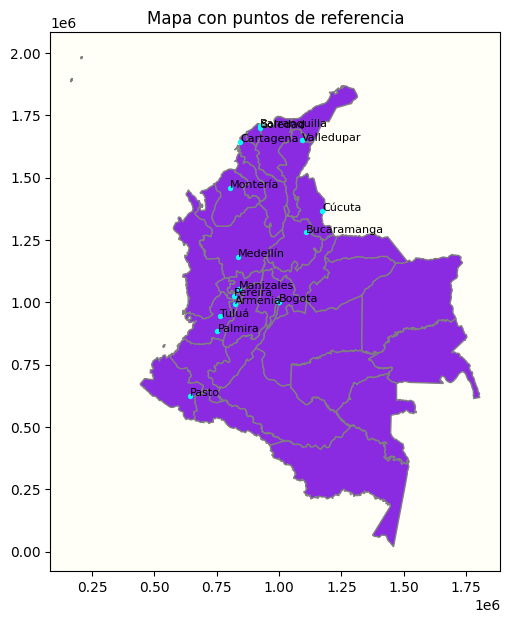

In [ ]:
#se carga el .shp de Colombia
mapacol = gpd.read_file('/work/colombia.shp')
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_facecolor('#FFFFF7')
mapacol.plot(ax=ax, color='#8A2BE2', edgecolor='gray')
plt.title("Mapa con puntos de referencia")
gdf.plot(ax=ax, markersize=8, color='cyan')
for i, txt in enumerate(gdf['cities']):
    ax.annotate(txt, (gdf['geometry'][i].x,gdf['geometry'][i].y), fontsize=8, color='black')


# Algoritmo Hormigas version
## Supuestos:
### Se escoge para el problema el realizarlo con el carro Cupra Formentor para el cual se tienen los siguientes datos


*   Consumo promedio de gasolina en carretera: 46 km/galón
*   Precio de gasolina al día de hoy(03/03/2024): 15.500
*   Sueldo básico del conductor: 5.652

In [ ]:
#se crea funcion para facilitar el calculo de distancias
from math import sin,cos,atan2,sqrt,radians
def distancia(coord1, coord2):
    #se define el radio de la tierra en km
    R = 6371.0

    #se convierten a radianes las coordenadas
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # se hace uso de la formula de Haversine para el calculo en kilometros de dos puntos
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    #finalmente la distancia entre los puntos
    dista = R * c
    return dista

In [ ]:
#se crea una matriz para almacenar las distancias
distances = [[0.0] * len(coordns) for i in range(len(coordns))]

#for anidado para calcular distancias entre cada par
for i in range(len(coordns)):
    for j in range(i + 1, len(coordns)):
        #se calcula la distancia usando la funcion creada anteriormente
        dist = distancia(coordns[i], coordns[j])
        #se almacenan las distancias redondeadas
        distances[i][j] = round(dist,2)
        distances[j][i] = round(dist,2)

matdist = np.array(distances).reshape(15,15)


In [ ]:
#se importan matrices en excel de cantidad de peajes y distancia entre lugares con formato 15x15
#se convierten a conveniencia en dataframes
peajes = pd.read_excel('/work/matrizpeajes.xlsx',header=None)
matpeaj = peajes.to_numpy()
times = pd.read_excel('/work/matriztiempos.xlsx', header=None) #en Total de Minutos
mattime = times.to_numpy()

### Matriz de costos

In [ ]:
#calculos y conversiones necesarias
cp = 10000 #costo promedio por peaje
ht = 5652 #hora de trabajo conductor
cg = 15500 #precio promedio de galon de gasolina

mattime = mattime/60 # Convertimos los minutos en horas
matdist = matdist/46 # Con esta operacion conseguimos el numero de kilometros por galon (nuestro carro hace 46 km/galon)

#se calcula matriz de costos
matcost = cp*mattime + matpeaj*8000 + cg*matdist


Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 3452100.94; overall: 3452100.94 (0s)
Best score at iteration 1: 3549734.02; overall: 3452100.94 (0s)
Best score at iteration 2: 4130139.67; overall: 3452100.94 (0s)
Best score at iteration 3: 3596798.91; overall: 3452100.94 (0s)
Best score at iteration 4: 3999188.44; overall: 3452100.94 (0s)
Best score at iteration 5: 3418916.41; overall: 3418916.41 (0s)
Best score at iteration 6: 4021294.38; overall: 3418916.41 (0s)
Best score at iteration 7: 4047100.04; overall: 3418916.41 (0s)
Best score at iteration 8: 4507263.41; overall: 3418916.41 (0s)
Best score at iteration 9: 3923732.54; overall: 3418916.41 (0s)
Best score at iteration 10: 3104181.3; overall: 3104181.3 (0s)
Best score at iteration 11: 3104181.3; overall: 3104181.3 (0s)
Best score at iteration 12: 3235551.38; overall: 3104181.3 (0s)
Best score at iteration 13: 3886927.57; overall: 3104181.3 (0s)
Best score at iteration 14: 4043991.74; overall: 3104181

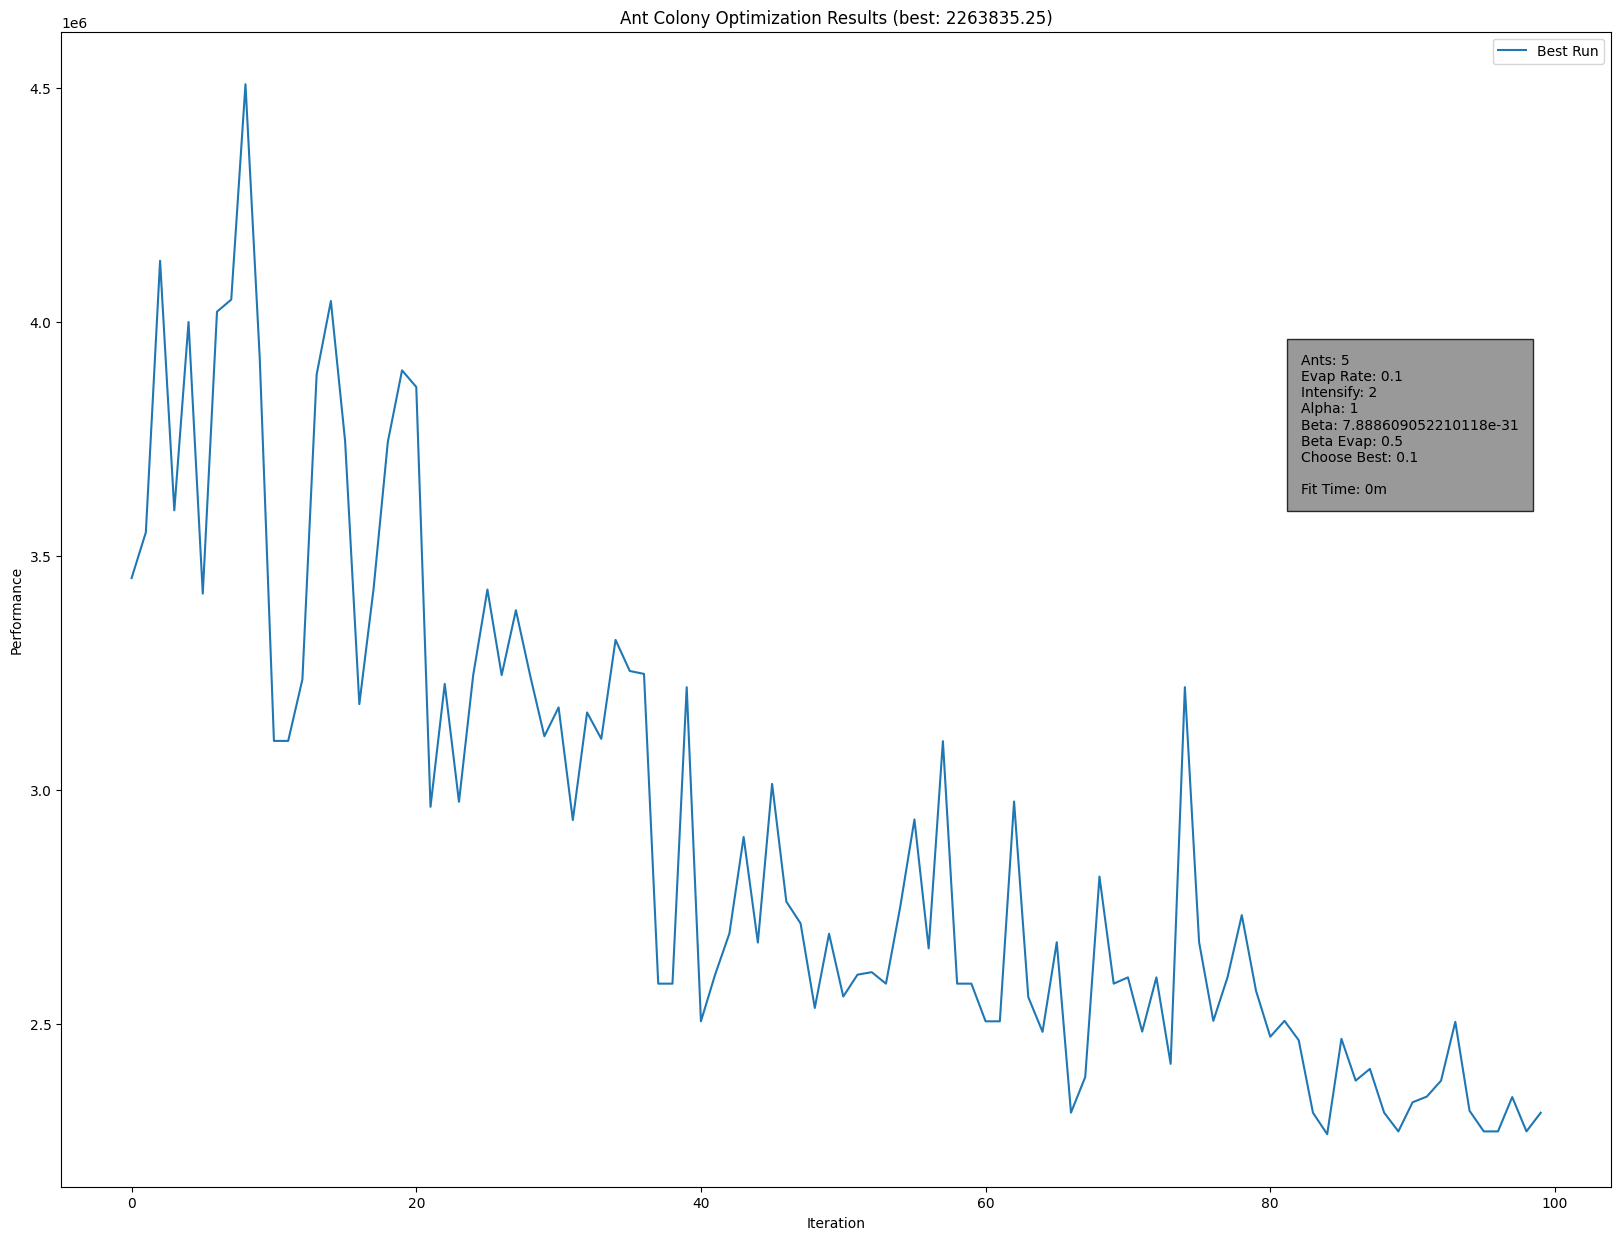

Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 3162041.2; overall: 3162041.2 (0s)
Best score at iteration 1: 3447654.31; overall: 3162041.2 (0s)
Best score at iteration 2: 2647955.07; overall: 2647955.07 (0s)
Best score at iteration 3: 3473845.04; overall: 2647955.07 (0s)
Best score at iteration 4: 3437248.59; overall: 2647955.07 (0s)
Best score at iteration 5: 3519600.8; overall: 2647955.07 (0s)
Best score at iteration 6: 3211573.7; overall: 2647955.07 (0s)
Best score at iteration 7: 3433409.89; overall: 2647955.07 (0s)
Best score at iteration 8: 2647955.07; overall: 2647955.07 (0s)
Best score at iteration 9: 2822492.14; overall: 2647955.07 (0s)
Best score at iteration 10: 2900018.51; overall: 2647955.07 (0s)
Best score at iteration 11: 3030237.68; overall: 2647955.07 (0s)
Best score at iteration 12: 2680441.34; overall: 2647955.07 (0s)
Best score at iteration 13: 2912847.28; overall: 2647955.07 (0s)
Best score at iteration 14: 3088627.21; overall: 264795

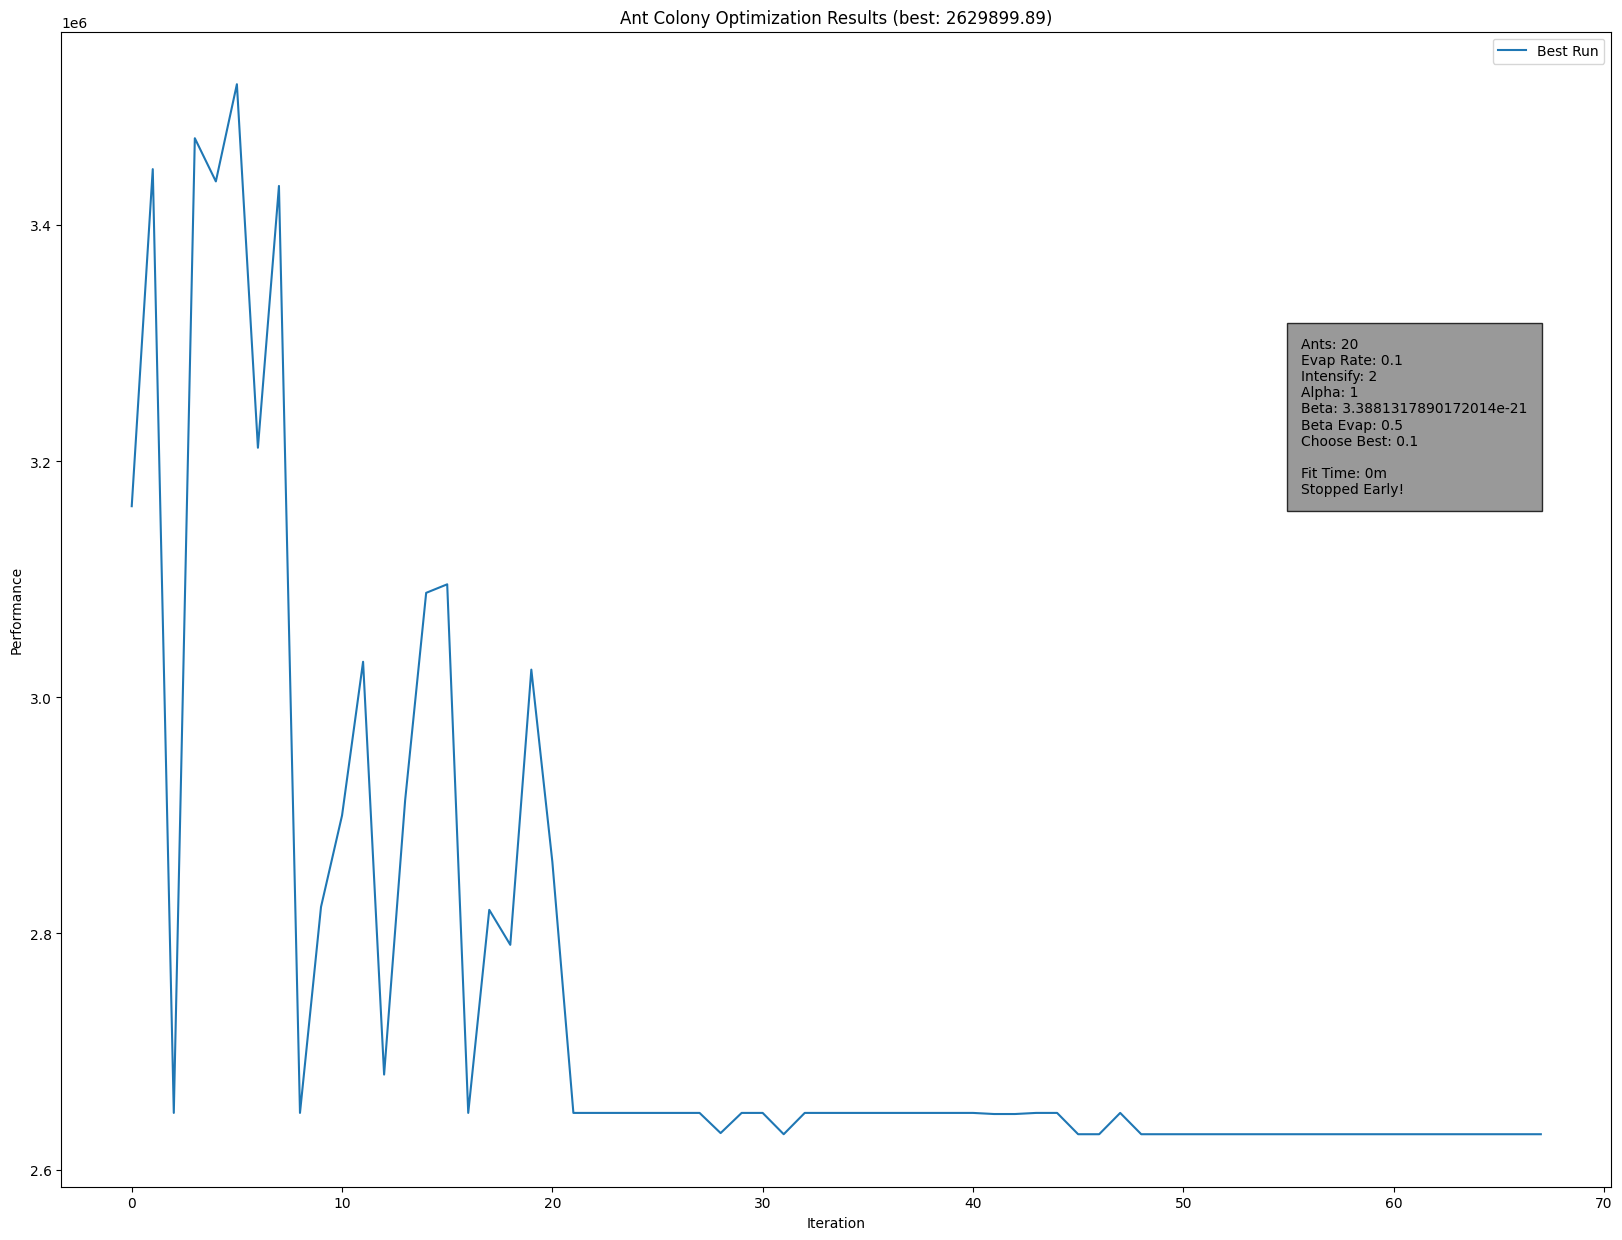

Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 2981183.59; overall: 2981183.59 (0s)
Best score at iteration 1: 2881647.25; overall: 2881647.25 (0s)
Best score at iteration 2: 3276542.28; overall: 2881647.25 (0s)
Best score at iteration 3: 3399626.92; overall: 2881647.25 (0s)
Best score at iteration 4: 2991948.7; overall: 2881647.25 (0s)
Best score at iteration 5: 3371397.68; overall: 2881647.25 (0s)
Best score at iteration 6: 3168065.91; overall: 2881647.25 (0s)
Best score at iteration 7: 2987187.86; overall: 2881647.25 (0s)
Best score at iteration 8: 2943022.68; overall: 2881647.25 (0s)
Best score at iteration 9: 2995990.8; overall: 2881647.25 (0s)
Best score at iteration 10: 2683775.29; overall: 2683775.29 (0s)
Best score at iteration 11: 2962727.07; overall: 2683775.29 (0s)
Best score at iteration 12: 2755331.74; overall: 2683775.29 (0s)
Best score at iteration 13: 2919166.45; overall: 2683775.29 (0s)
Best score at iteration 14: 2640042.03; overall: 264

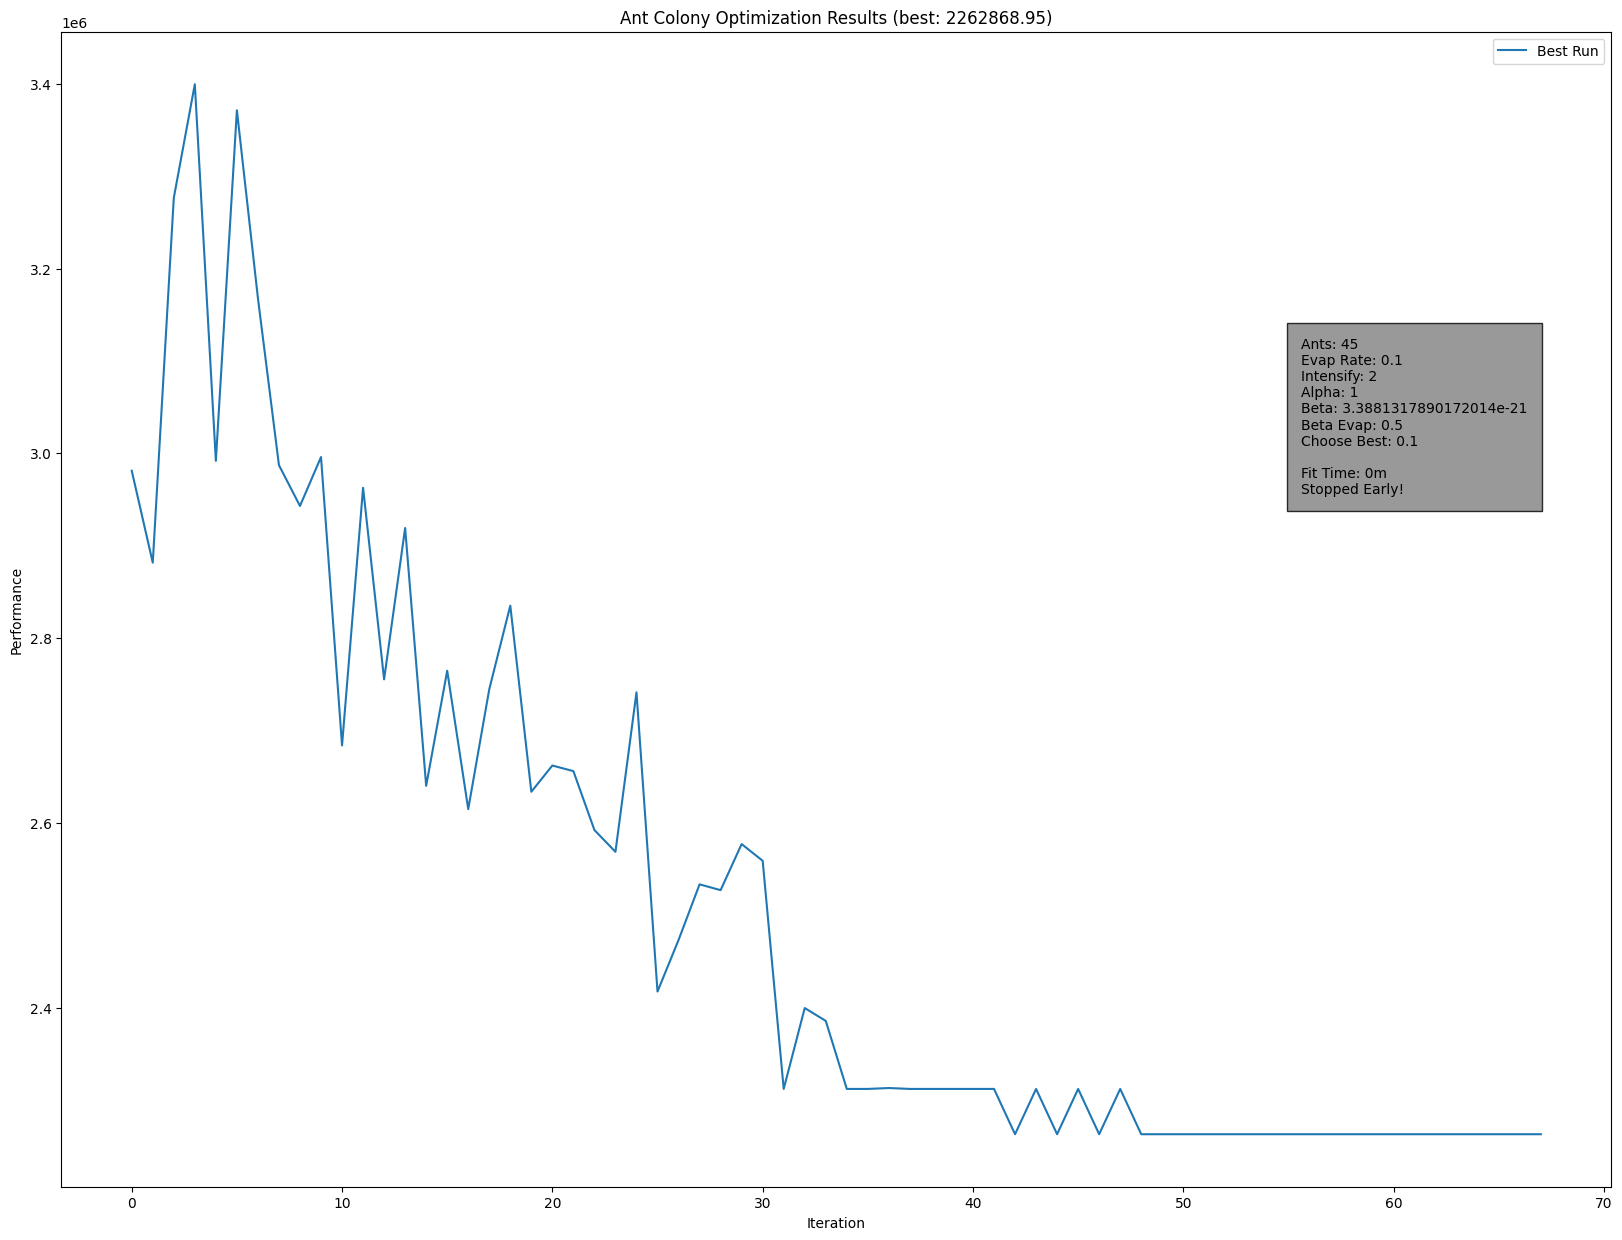

Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 2930299.6; overall: 2930299.6 (0s)
Best score at iteration 1: 3023571.92; overall: 2930299.6 (0s)
Best score at iteration 2: 3264483.95; overall: 2930299.6 (0s)
Best score at iteration 3: 3037891.38; overall: 2930299.6 (0s)
Best score at iteration 4: 3304056.78; overall: 2930299.6 (0s)
Best score at iteration 5: 2910690.8; overall: 2910690.8 (0s)
Best score at iteration 6: 3010836.92; overall: 2910690.8 (0s)
Best score at iteration 7: 2878456.63; overall: 2878456.63 (0s)
Best score at iteration 8: 3027212.03; overall: 2878456.63 (0s)
Best score at iteration 9: 2639095.94; overall: 2639095.94 (0s)
Best score at iteration 10: 2668214.02; overall: 2639095.94 (0s)
Best score at iteration 11: 2738740.33; overall: 2639095.94 (0s)
Best score at iteration 12: 2774043.04; overall: 2639095.94 (0s)
Best score at iteration 13: 2432834.2; overall: 2432834.2 (0s)
Best score at iteration 14: 2537699.78; overall: 2432834.2 (0

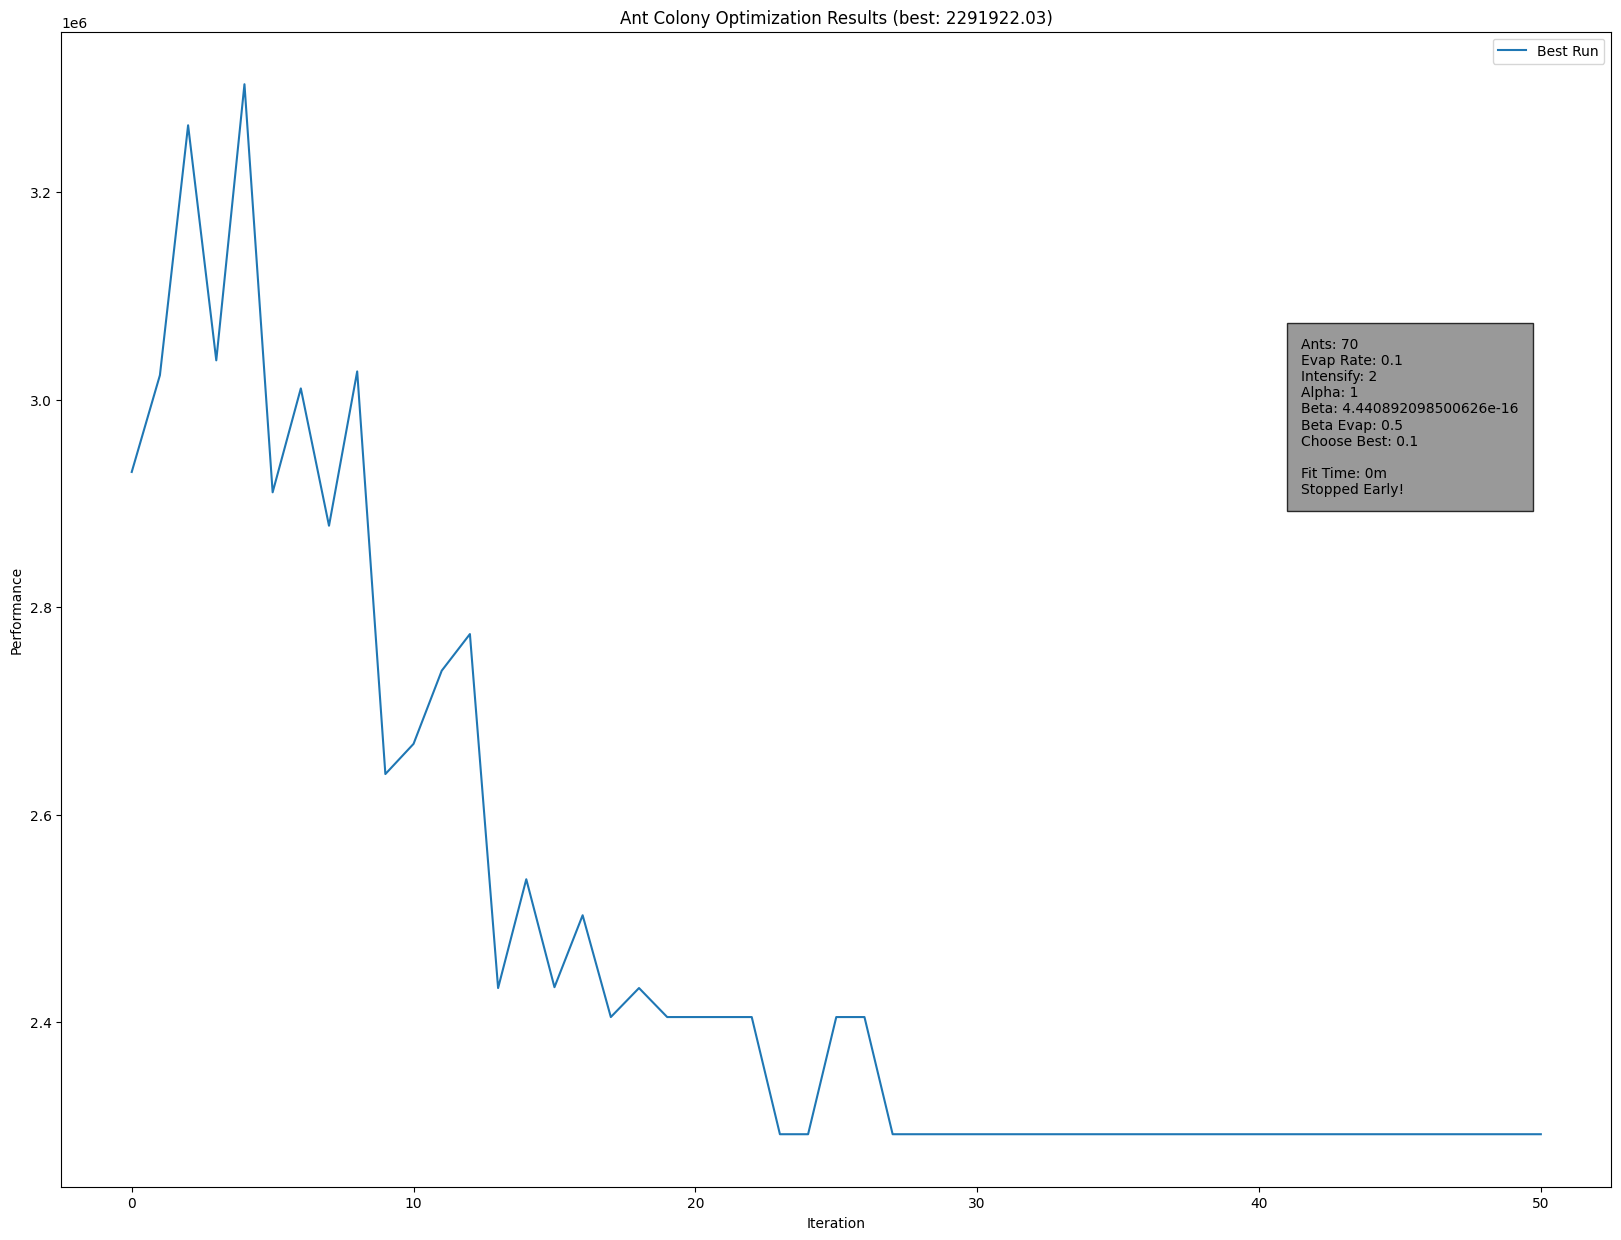

Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 2702067.43; overall: 2702067.43 (0s)
Best score at iteration 1: 2828918.15; overall: 2702067.43 (0s)
Best score at iteration 2: 2834897.28; overall: 2702067.43 (0s)
Best score at iteration 3: 2863948.37; overall: 2702067.43 (0s)
Best score at iteration 4: 2975223.91; overall: 2702067.43 (0s)
Best score at iteration 5: 2772466.23; overall: 2702067.43 (0s)
Best score at iteration 6: 2680252.43; overall: 2680252.43 (0s)
Best score at iteration 7: 2645736.7; overall: 2645736.7 (0s)
Best score at iteration 8: 2632522.64; overall: 2632522.64 (0s)
Best score at iteration 9: 2645736.7; overall: 2632522.64 (0s)
Best score at iteration 10: 2719605.83; overall: 2632522.64 (0s)
Best score at iteration 11: 2629141.7; overall: 2629141.7 (0s)
Best score at iteration 12: 2602817.21; overall: 2602817.21 (0s)
Best score at iteration 13: 2559773.62; overall: 2559773.62 (0s)
Best score at iteration 14: 2538672.28; overall: 253867

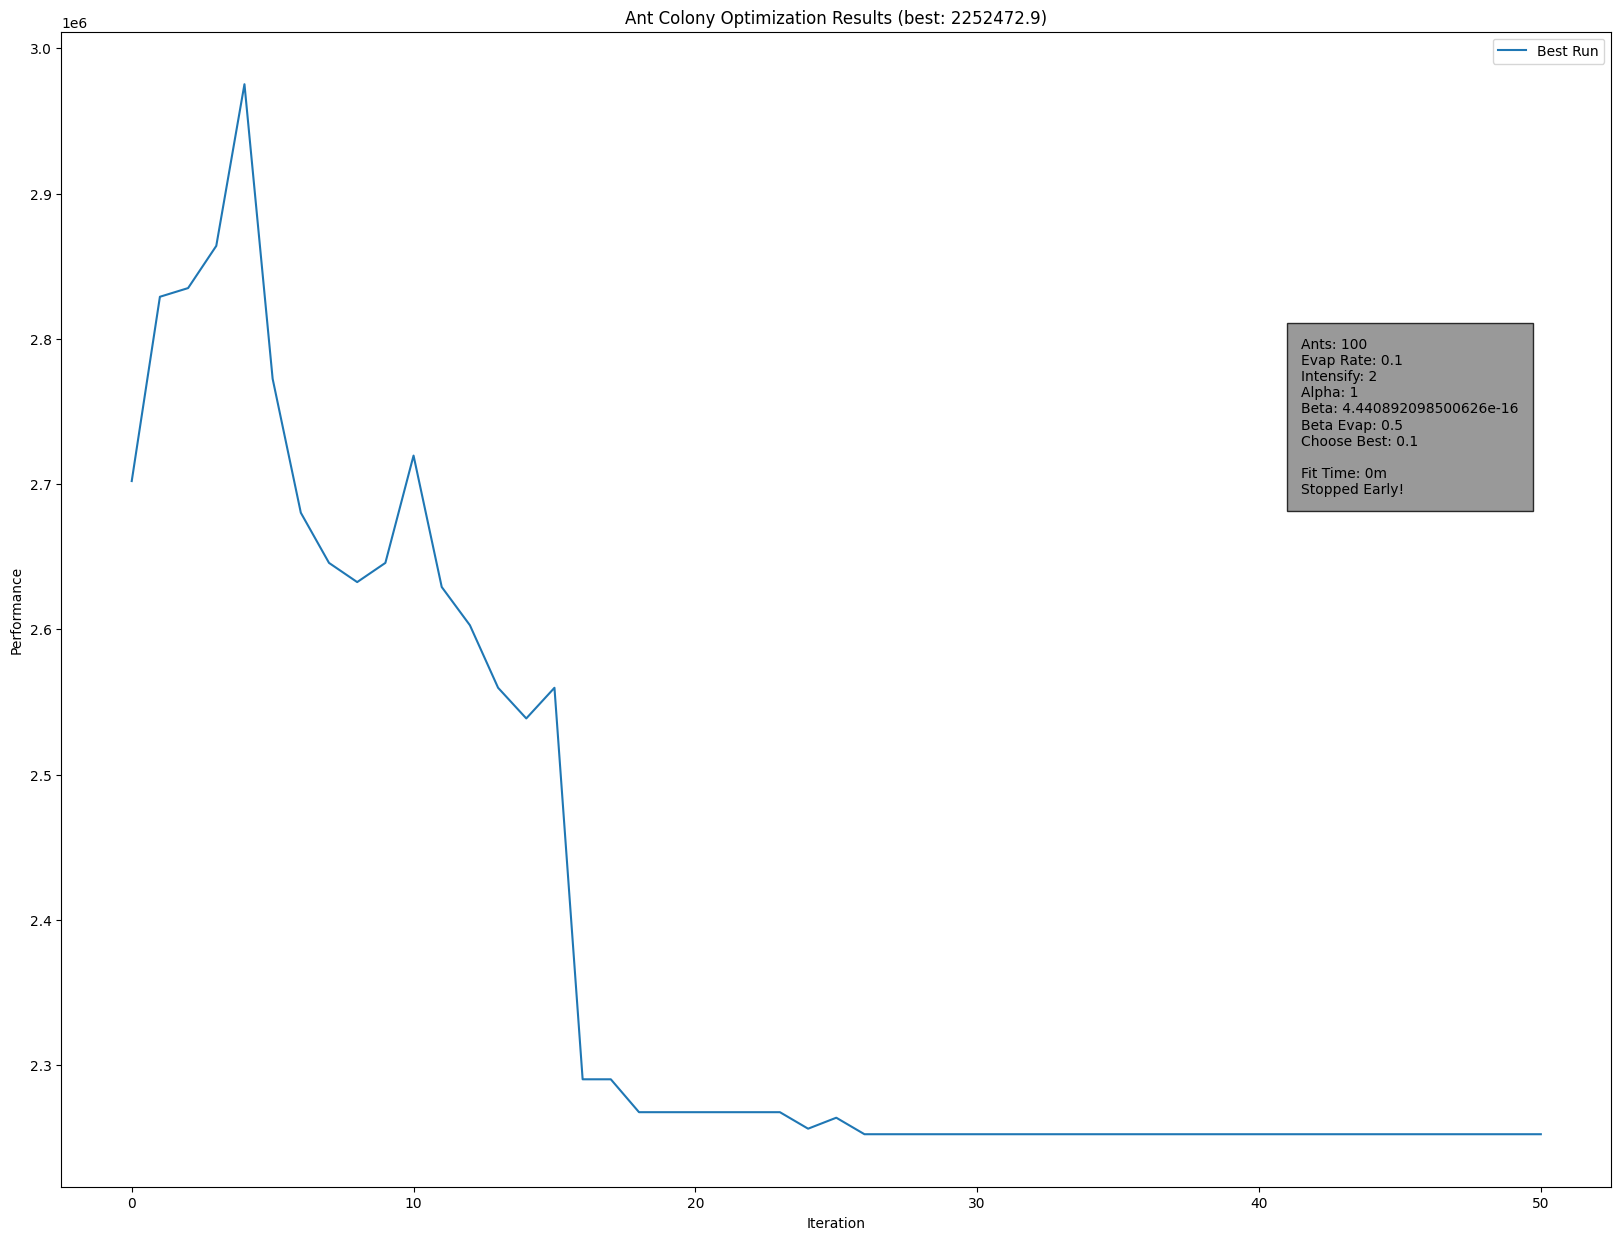

In [ ]:
hormigas=[5,20,45,70,100] #cantidad de hormigas a evaluar
bestRoute=[]
for i in range(len(hormigas)):
    optimizer = AntColonyOptimizer(ants=hormigas[i], evaporation_rate=.1, intensification=2, alpha=1, beta=1,
                                beta_evaporation_rate=0.5, choose_best=.1)
    best = optimizer.fit(matcost, 100) #se inicializa con 100 iteraciones
    optimizer.plot()
    bestRoute.append(optimizer.best_path) #se guarda la mejor ruta para cada cantidad

### Se calculan los costos totales por cada recorrido

In [ ]:
#para calcular el costo total en cada recorrido
def costos(ruta, costos):
    costo = 0
    for i in range(len(ruta) - 1):
        costo += matcost[ruta[i]][ruta[i+1]]
    return costo

for i in range(len(bestRoute)):
    print("El costo total del recorrido: $", round(costos(bestRoute[i], matcost), 2), "pesos para un total de", hormigas[i], "Hormigas")

El costo total del recorrido: $ 2263835.25 pesos para un total de 5 Hormigas
El costo total del recorrido: $ 2629899.89 pesos para un total de 20 Hormigas
El costo total del recorrido: $ 2262868.95 pesos para un total de 45 Hormigas
El costo total del recorrido: $ 2291922.03 pesos para un total de 70 Hormigas
El costo total del recorrido: $ 2252472.9 pesos para un total de 100 Hormigas


### Soluciones en mapa

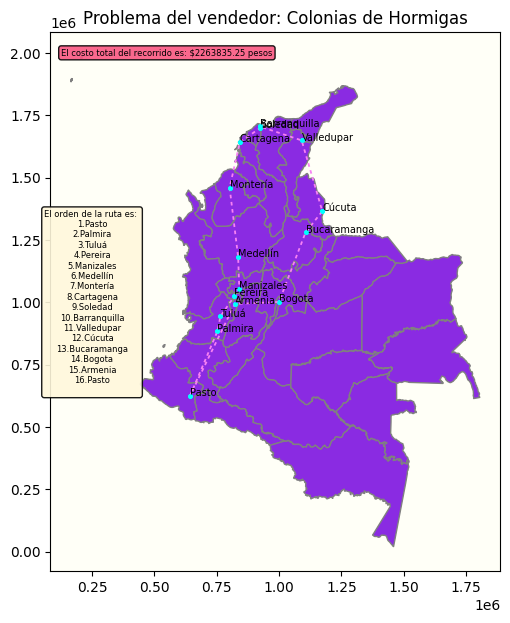

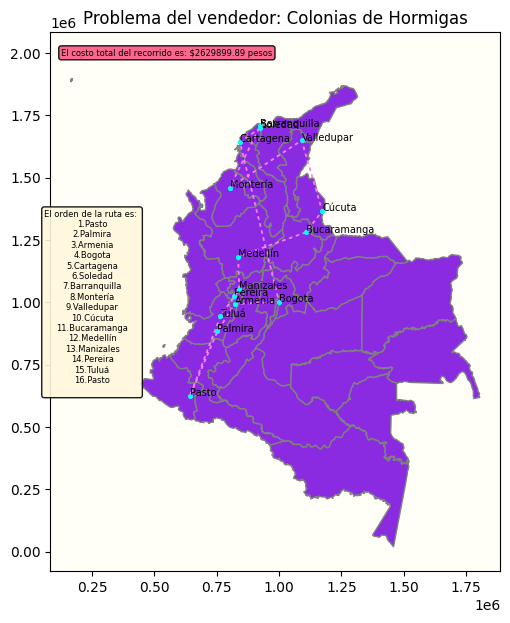

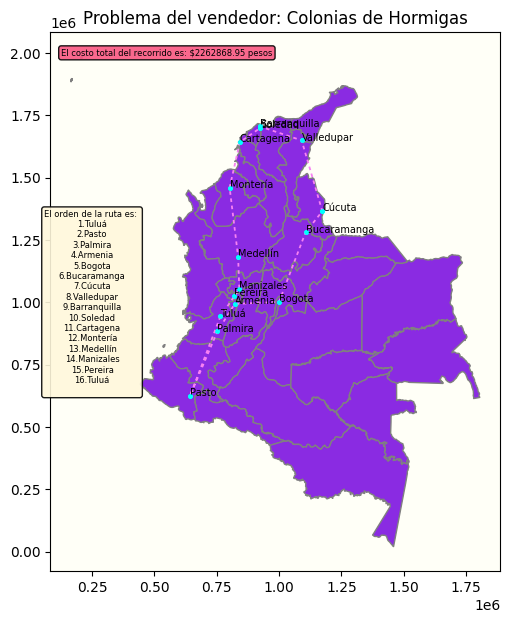

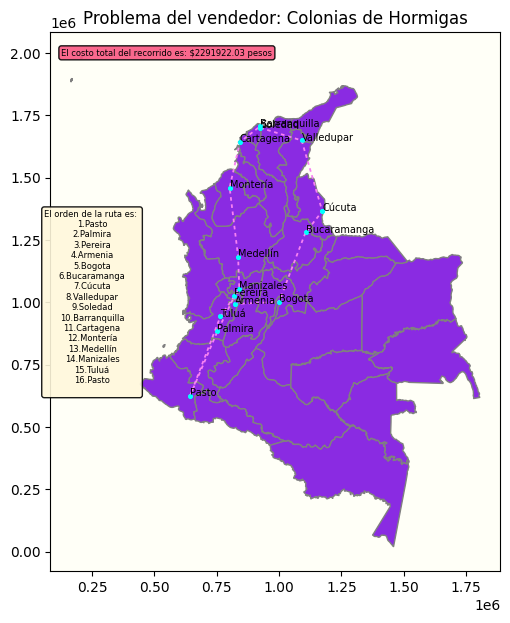

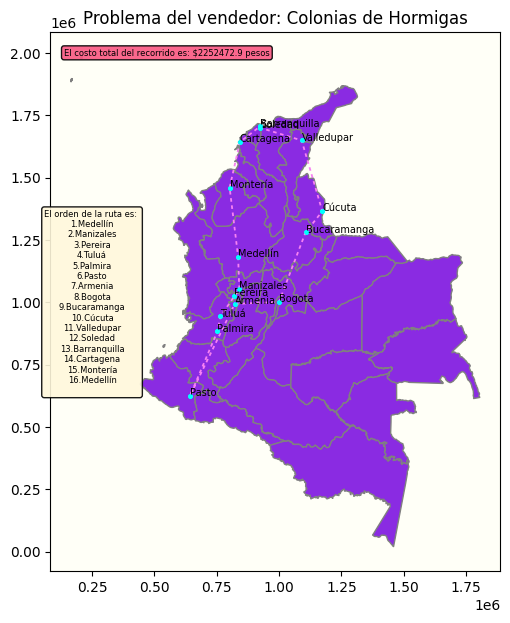

In [ ]:
folder_path = "/work/routesh/"
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
imagesroute2 = []

for i in range(len(bestRoute)):
    texto = "El orden de la ruta es: "+"\n"
    texto2 = "El costo total del recorrido es: $" + str(round(costos(bestRoute[i], matcost), 2))+" pesos"

    current_sol = bestRoute[i]
    for j in range(len(current_sol)):
        texto += str(j+1)+"."+str(cities[current_sol[j]])+"\n"

    # Aqui obtenemos la ruta segun sea la solucion
    rutacol = [gdf.iloc[i]['geometry']for i in bestRoute[i]]

    #creamos el plot de la ruta
    fig, ax = plt.subplots(figsize=(7, 7))
    mapacol.plot(ax=ax, color='#8A2BE2', edgecolor='gray')
    gdf.plot(ax=ax, markersize=7, color='cyan')
    ax.set_facecolor('#FFFFF7')

    for i, txt in enumerate(gdf['cities']):
        ax.annotate(txt, (gdf['geometry'][i].x,
                    gdf['geometry'][i].y), fontsize=7)

    gdf.plot(ax=plt.gca(), color='cyan', markersize=5, zorder=3)

    plt.plot([p.x for p in rutacol], [p.y for p in rutacol],
             color='#F781F3', linestyle='--', linewidth=1.3, dashes=[2, 2], zorder=2)

    plt.text(250000, 1000000, texto, ha='center', va='center', size=6,
             bbox=dict(boxstyle='round', facecolor='#FFF8DC', alpha=0.9))

    plt.text(550000, 2000000, texto2, ha='center', va='center', size=6,
             bbox=dict(boxstyle='round', facecolor='#FA5882', alpha=0.9))

    plt.title("Problema del vendedor: Colonias de Hormigas")

    name = f"/work/routesh/ruta_{random.randint(0, 100000)}.png"

    imagesroute2.append(name)

    plt.savefig(name)

#se crea el gif con las rutas
with imageio.get_writer('/work/routesh/gifmapa.gif', mode='I', duration=2000) as writer:
    for ruta in imagesroute2:
        image = imageio.imread(ruta)
        writer.append_data(image)


# Algoritmos Genéticos version

In [ ]:
images = []

def tsp_fitness(solution, s_idx):
    #se realizan ajustes a la solucion para su iteracion
    solution = solution.tolist()
    solution = [int(x) for x in solution]

    #se verifica que no haya ciudades repetidas
    if len(set(solution)) != len(solution):
        return 0  #retorna cero si hay ciudades repetidas

    #se verifica que no falte ninguna ciudad
    if set(solution) != set(range(len(cities))):
        return 0  #retorna cero si falta alguna ciudad

    #se calcula el costo total
    distance = 0
    for i in range(len(solution)-1):
        distance += matcost[solution[i]][solution[i+1]]
    distance += matcost[solution[-1]][solution[0]]  #se cierra el ciclo

    #se retorna el inverso de la distancia
    return 1/distance

generations = [100, 200, 350, 500, 1200, 1500]
bestsol = []
sol_per_pop = 15
initialSolutions = [list(set(np.random.permutation(index_cities)))
                        for _ in range(sol_per_pop)]
for i in range(len(generations)):
    num_generations = generations[i]
    #se crea el algoritmo genetico de la libreria pygad
    ViajeroGA = pygad.GA(num_generations=num_generations,
                        num_parents_mating=4,
                        sol_per_pop=sol_per_pop,
                        num_genes=len(cities),
                        initial_population=initialSolutions,
                        mutation_percent_genes=30,
                        fitness_func=tsp_fitness,
                        mutation_type="scramble",
                        init_range_low=1,
                        init_range_high=15,
                        parent_selection_type="rank")
    #se ejecuta el algoritmo genetico
    ViajeroGA.run()

    #se obtiene la mejor solucion
    solution, solution_fitness, solution_idx = ViajeroGA.best_solution()
    solution_indices = [int(x) for x in solution.tolist()]
    bestsol.append(solution_indices)
    bestCity = []
    for i in solution_indices:
        bestCity.append(cities[i])

    #se imprime la mejor solucion encontrada
    print("Mejor solución encontrada en:",
          num_generations, "iteraciones es:", bestCity)

Mejor solución encontrada en: 100 iteraciones es: ['Medellín', 'Pereira', 'Manizales', 'Armenia', 'Tuluá', 'Pasto', 'Palmira', 'Bogota', 'Bucaramanga', 'Cúcuta', 'Valledupar', 'Barranquilla', 'Soledad', 'Cartagena', 'Montería']
Mejor solución encontrada en: 200 iteraciones es: ['Manizales', 'Bogota', 'Pereira', 'Armenia', 'Palmira', 'Pasto', 'Tuluá', 'Montería', 'Cartagena', 'Barranquilla', 'Soledad', 'Valledupar', 'Cúcuta', 'Bucaramanga', 'Medellín']
Mejor solución encontrada en: 350 iteraciones es: ['Bogota', 'Armenia', 'Pasto', 'Palmira', 'Tuluá', 'Pereira', 'Manizales', 'Medellín', 'Montería', 'Barranquilla', 'Cartagena', 'Soledad', 'Valledupar', 'Bucaramanga', 'Cúcuta']
Mejor solución encontrada en: 500 iteraciones es: ['Bogota', 'Tuluá', 'Palmira', 'Pasto', 'Armenia', 'Pereira', 'Manizales', 'Medellín', 'Montería', 'Soledad', 'Barranquilla', 'Cartagena', 'Valledupar', 'Bucaramanga', 'Cúcuta']
Mejor solución encontrada en: 1200 iteraciones es: ['Tuluá', 'Pasto', 'Palmira', 'Armeni

### Se calcula costos de los recorridos

In [ ]:
#se define funcion para calcular el costo total de la solucion
def total(route, costs):
    costs = 0
    for i in range(len(route) - 1):
        costs += matcost[route[i]][route[i+1]]
    return costs
#se imprime el costo total de cada solucion
for i in range(len(bestsol)):
    print("El costo total del recorrido es: ",round(total(bestsol[i],matcost),2)," pesos para un total de ", generations[i], "iteraciones")


El costo total del recorrido es:  2113791.01  pesos para un total de  100 iteraciones
El costo total del recorrido es:  2421477.93  pesos para un total de  200 iteraciones
El costo total del recorrido es:  2126163.66  pesos para un total de  350 iteraciones
El costo total del recorrido es:  2093463.19  pesos para un total de  500 iteraciones
El costo total del recorrido es:  2163875.47  pesos para un total de  1200 iteraciones
El costo total del recorrido es:  2112907.5  pesos para un total de  1500 iteraciones


El análisis de los costos totales del recorrido en función del número de iteraciones revela un patrón interesante: inicialmente, pocos intentos resultan eficientes en costos. Sin embargo, aumentar las iteraciones no siempre mejora la eficiencia y puede llevar a costos más altos. Curiosamente, al extender significativamente las iteraciones, se observa una tendencia a la reducción del costo, indicando un punto óptimo de eficiencia. Este fenómeno subraya la importancia de encontrar un equilibrio adecuado entre el número de iteraciones y el costo total, destacando que más iteraciones pueden, hasta cierto punto, optimizar los costos.

### Soluciones en mapa

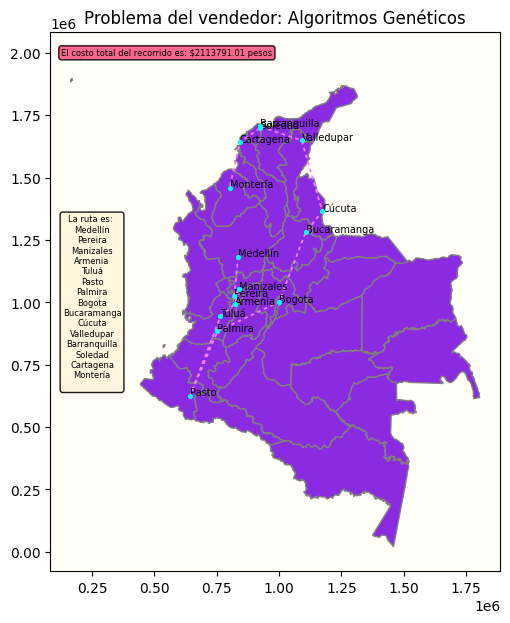

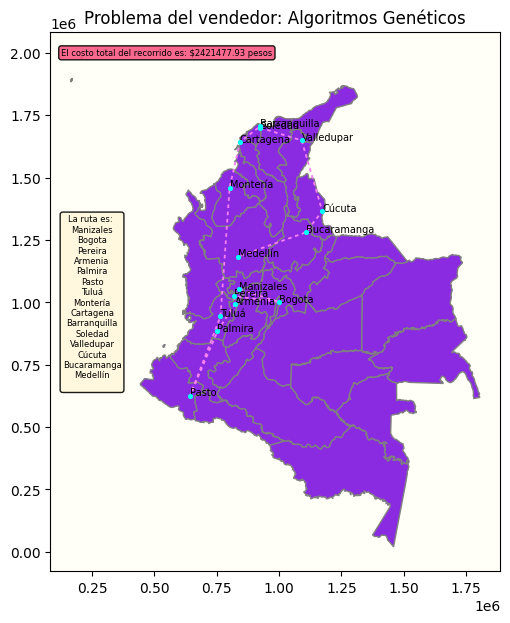

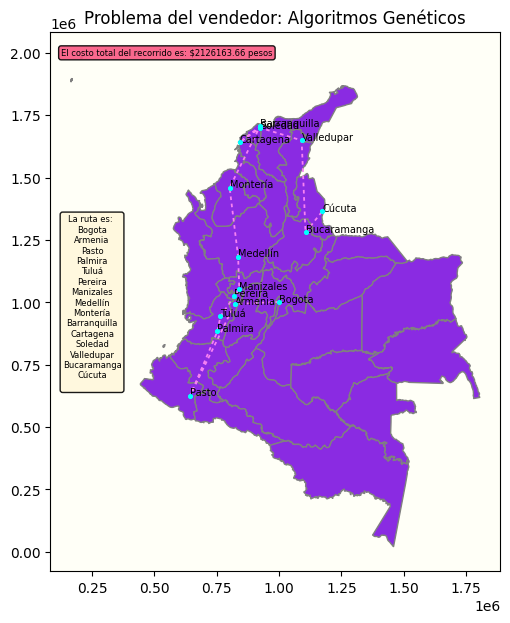

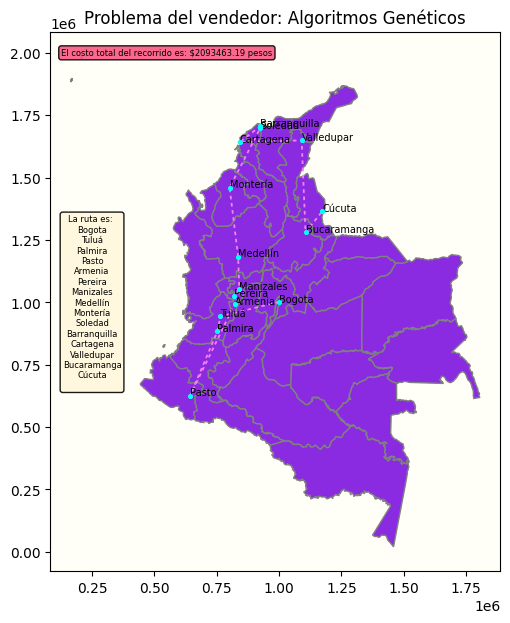

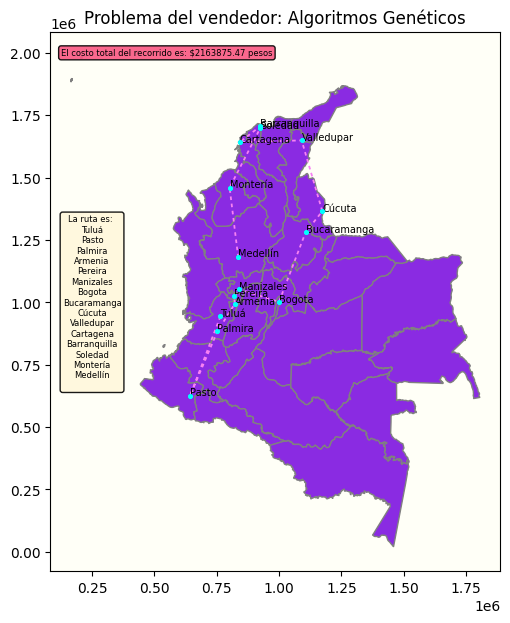

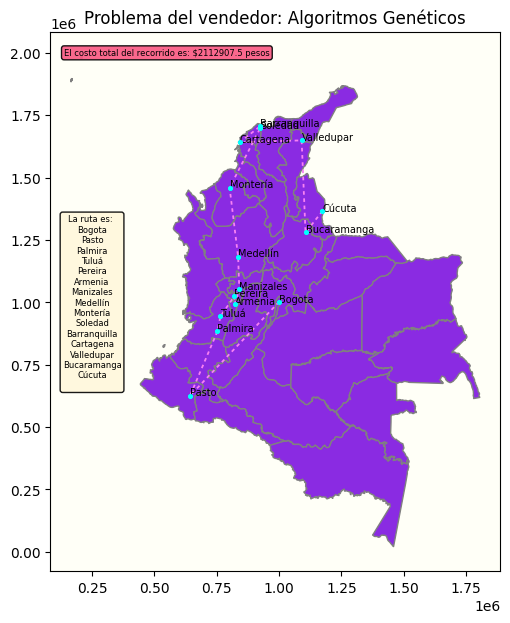

In [ ]:
folder_path = "/work/routesb/"
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
# Lista para almacenar las rutas de las rutas de las imágenes PNG
imagesroute1 = []

for i in range(len(bestsol)):
    texto = "La ruta es: "+"\n" # texto inical para añadir las rutas al plot
    texto2 = "El costo total del recorrido es: $"+str(round(total(bestsol[i], matcost), 2))+" pesos" #Texto para añadir el valor de la ruta

    current_sol = bestsol[i] #Obtenbemos la soulcion por iteracion
    for j in range(len(current_sol)):
        texto += str(cities[current_sol[j]])+"\n"

    rutacol = [gdf.iloc[i]['geometry']for i in bestsol[i]] #Aqui obtenemos la ruta segun sea la solucion
    
    #creamos el plot de la ruta
    fig, ax = plt.subplots(figsize=(7, 7))
    mapacol.plot(ax=ax, color='#8A2BE2', edgecolor='gray')
    gdf.plot(ax=ax, markersize=5, color='cyan')
    ax.set_facecolor('#FFFFF7')
    
    for i, txt in enumerate(gdf['cities']):
        ax.annotate(txt, (gdf['geometry'][i].x,
                    gdf['geometry'][i].y), fontsize=7)

    gdf.plot(ax=plt.gca(), color='cyan', markersize=7, zorder=3)

    plt.plot([p.x for p in rutacol], [p.y for p in rutacol],
             color='#F781F3', linestyle='--', linewidth=1.3, dashes=[2, 2], zorder=2)
    
    plt.text(250000, 1000000, texto, ha='center', va='center', size=6,
             bbox=dict(boxstyle='round', facecolor='#FFF8DC', alpha=0.9))
    
    plt.text(550000, 2000000, texto2, ha='center', va='center', size=6,
             bbox=dict(boxstyle='round', facecolor='#FA5882', alpha=0.9))
    
    plt.title("Problema del vendedor: Algoritmos Genéticos")

    #se crea el nombre del archivo para guardar la imagen
    name = f"/work/routesb/ruta_{random.randint(0, 100000)}.png"
    
    #se añade el nombre del archivo a la lista de rutas
    imagesroute1.append(name)

    #se guarda la imagen
    plt.savefig(name)

#se crea el gif con las rutas de las soluciones
with imageio.get_writer('/work/routesb/gifmapa.gif', mode='I', duration=2000) as writer:
    for route in imagesroute1:
        image = imageio.imread(route)
        writer.append_data(image)


### Gif con mejores soluciones

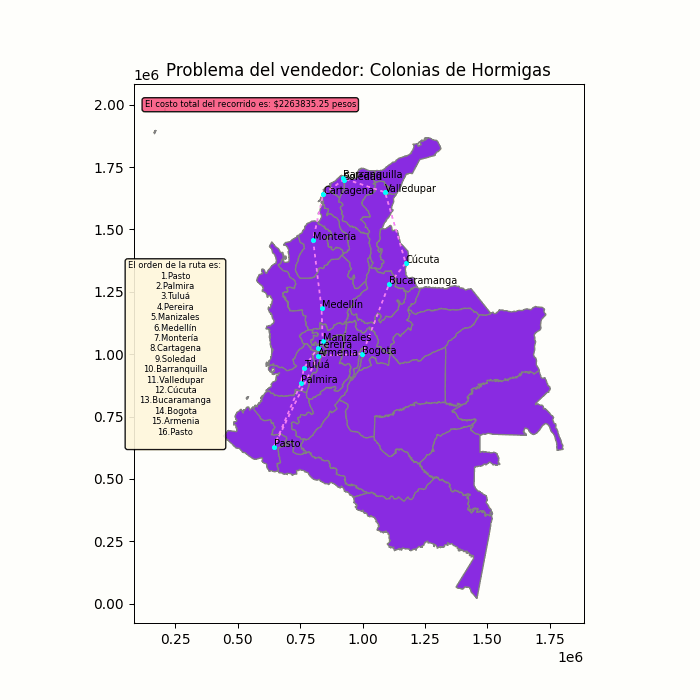

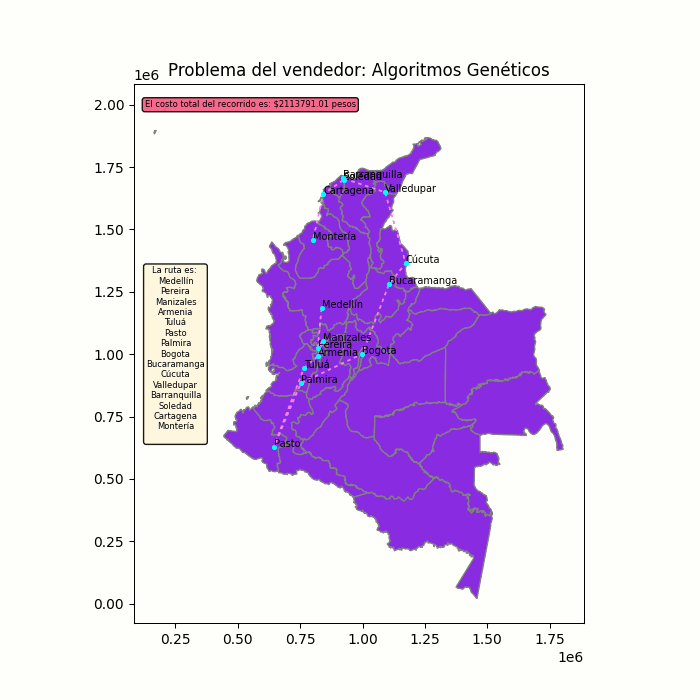

In [ ]:
from IPython.display import Image, display

gif1 = Image(filename="/work/routesb/gifmapa.gif")
gif2 = Image(filename="/work/routesh/gifmapa.gif")
display( gif2,gif1)

# Bibliografía
- Johnberroa. (s. f.). Ant-Colony-Optimization/AntColonyOptimizer.py at master · johnberroa/Ant-Colony-Optimization. GitHub. https://github.com/johnberroa/Ant-Colony-Optimization/blob/master/AntColonyOptimizer.py
- Ordóñez, N. R. (2022, 16 junio). CUPRA Formentor, a prueba: muy llamativo, pero ¿qué tan deportivo? (+VIDEO). El Carro Colombiano. https://www.elcarrocolombiano.com/pruebas/cupra-formentor-a-prueba-es-posible-un-suv-deportivo-y-llamativo-video/
- Rairán, S. (2024, 16 enero). La jornada laboral se reducirá en 2024: la medida entrará en vigor desde julio. Infobae. https://www.infobae.com/colombia/2024/01/16/la-jornada-laboral-se-reducira-en-2024-la-medida-entrara-en-vigor-desde-julio/#:~:text=Tarifas%20para%202024&text=Seg%C3%BAn%20la%20nueva%20normativa%2C%20el,42%20horas%20semanales%20para%202026.
- Geoportal DANE - Descarga del Marco Geoestadistico Nacional (MGN). (s. f.). DANE - Departamento Administrativo Nacional de Estadística. https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/

# PORCETAJE DE CONTRIBUCIONES

Solución del primero punto: Ronald Palencia
Solución del segundo punto: Junior Antonio Muñoz.
Organizar detaller finales: Ronald Palencia y Junior Antonio Muñoz


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f9450d2-a1da-4ad6-8125-c8a4b803f40c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>